In [1]:
# use this code to create figures of preprocessed and modeled predictors

In [2]:
# import 
import os
import csv 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

files = ['/home/anakin/Desktop/ds000113/output/1st_level/model/01/modelgen_run_1/run0.mat',
         '/home/anakin/Desktop/ds000113/output/1st_level/model/01/modelgen_run_2/run0.mat']
names = ['run-1','run-2']
output_dir = os.path.join(os.getcwd(),"model")
try:    
    os.makedirs(output_dir)
except:
    pass

# select run
num = input("which run? [1/2]: \n")
file = open(files[int(num)-1])
reader = csv.reader(file, delimiter="\t")
matrix = False
evs = []
for row in reader:
    #print(row)
    if matrix:
        
        values = [float(x) for x in row[:-1]]
        evs.append(values)
    
    if row == ['/Matrix']:
        matrix = True
name = names[int(num)-1]

which run? [1/2]: 
2


In [3]:
# create dataframe 
data = {}
for i,ev in enumerate(evs):
    key = str(i+1)
    data[key] = ev
# create dataframe
df = pd.DataFrame(data)
# filter the hrf predictor and transpose
dataFrame = df.transpose()

In [4]:
dim = dataFrame.shape # get shape of dataframe as tuple
dataFrame = dataFrame.set_axis(["ev"+str(i+1) for i in range(dim[1])], axis=1)

In [5]:
# our evs correspond to the text evs in level1design folder. 
# since each participant had the same design, we can use any subject for everybody
# [affect, affect_var, brmean, face, gaze,
#  gaze_var, general, general_var, location, lrd_iff,
#  music, normdiff, rms, shot, speech
#  touch, touch_var]

In [6]:
# erase last columns (art) - not relevant for FEAT-gui output
# extract specificaly ordered matrices for RSA
column_list = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33]
data = dataFrame.iloc[: , column_list]
predictors = ['affect', 'affect_var', 'brmean', 'face', 'gaze',
              'gaze_var', 'general', 'general_var', 'location', 'lr_diff',
              'music', 'normdiff', 'rms', 'shot', 'speech',
              'touch', 'touch_var']
data = data.set_axis(predictors, axis=1)

In [7]:
data4plot = data[['gaze','touch','affect','general','normdiff','shot','location','face','rms','music','speech']].copy()
predictors=['gaze','touch','affect','general','normdiff','shot','location','face','rms','music','speech']

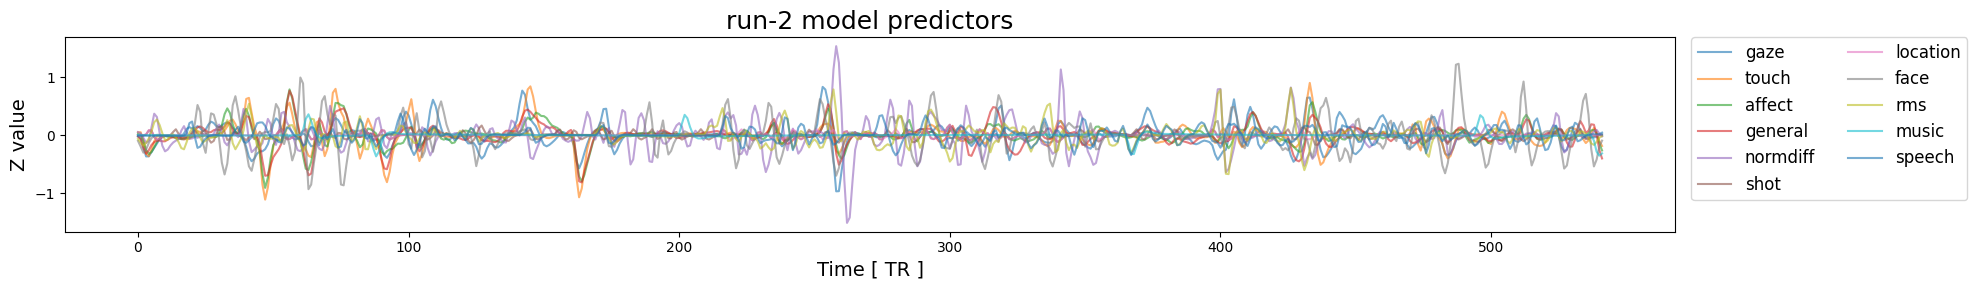

In [8]:
ev_list = data4plot.to_numpy().transpose()

fig, axes = plt.subplots(1, 1, figsize=(20, 3))
for i,ev in enumerate(ev_list):
    plt.plot(ev,alpha=0.6,label = predictors[i])

titleStr = name + ' model predictors'
axes.set_title(titleStr,fontsize=18)
axes.set_ylabel('Z value',fontsize=14)
axes.set_xlabel('Time [ TR ]', fontsize=14)
axes.legend()
axes.legend(bbox_to_anchor=(1.01, 1),loc='upper left', borderaxespad=0.,ncol=2,fontsize=12)
plt.tight_layout()

# save run plot
plt.savefig(os.path.join(os.getcwd(),'model',name+"_model_predictor_TC.jpg"))

In [9]:
def plotCorrMat(df,title):
    """
    """
    import os
    
    m = df.corr()
    mask_ut=np.triu(np.ones(m.shape)).astype(bool)

    fig, axes = plt.subplots(1, 1, figsize=(9,7))
    titleStr = name + ': model predictors correlation matrix'
    axes.set_title(titleStr,fontsize=16)
    sns.heatmap(m,annot=True,cmap=sns.color_palette("RdBu_r", as_cmap=True),mask=mask_ut,vmin=-1, vmax=1) # use mask=mask_ut for lower t
    plt.tight_layout()
    # save
    output_dir = os.path.join(os.getcwd(),"processed")
    plt.savefig(os.path.join(os.getcwd(),'model',title+"_CorrMat.jpg"))
    return m

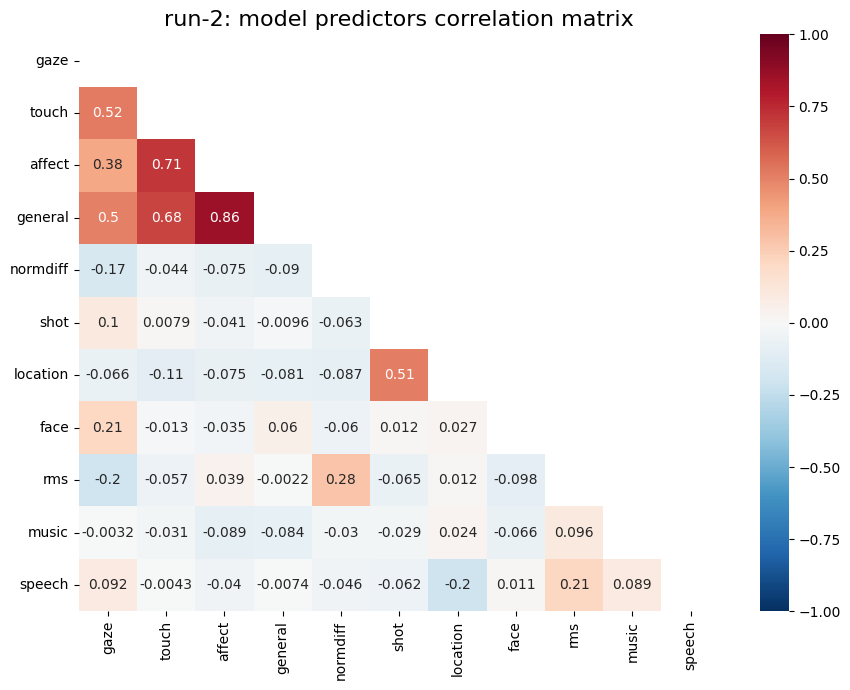

In [10]:
corrMat = plotCorrMat(data4plot,name)

In [11]:
data4plot

,gaze,touch,affect,general,normdiff,shot,location,face,rms,music,speech
1,-0.024078,0.050530,0.021225,-0.017422,0.054331,-0.005258,0.001120,-0.096751,-0.064312,0.002343,-0.007404
2,-0.054835,0.051429,0.005742,-0.071663,0.031324,-0.005241,0.001095,-0.196041,-0.126232,0.002223,-0.007404
3,-0.206489,-0.090008,-0.100947,-0.225475,-0.045429,-0.005184,0.001044,-0.300876,-0.181006,0.002002,-0.007501
4,-0.365590,-0.313390,-0.254870,-0.319518,-0.132486,0.010876,0.016946,-0.245291,-0.131826,0.001781,-0.007774
5,-0.363593,-0.362738,-0.322497,-0.257941,-0.093033,0.082089,0.087971,-0.131620,-0.054773,0.001560,-0.008098
...,...,...,...,...,...,...,...,...,...,...,...
538,-0.034638,0.041982,0.084468,0.188754,0.003229,-0.035443,-0.000054,-0.237320,-0.140415,-0.001856,0.015778
539,-0.040085,0.122268,0.089651,0.180651,0.065140,-0.014517,-0.000054,-0.537857,-0.166613,-0.092581,0.018049
540,-0.022931,0.062300,0.031360,0.007346,0.091440,-0.002017,-0.000054,-0.418829,-0.114646,-0.284432,0.016727
541,0.020556,-0.096936,-0.141007,-0.257665,0.028207,0.004420,-0.000054,-0.194659,-0.044234,-0.352081,0.014262


In [12]:
# save corr mat as a csv
filename = os.path.join(os.getcwd(),'model',name+'_predictor_corrmat.csv')
corrMat.to_csv(filename)

<Figure size 640x480 with 0 Axes>

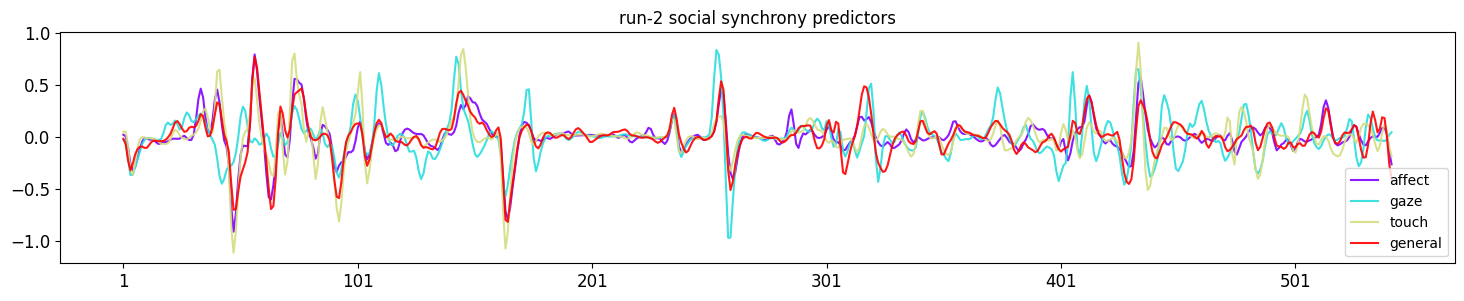

In [13]:
fig = plt.figure()
axes = data4plot.plot(y=["affect", "gaze","touch","general"],title = name +' social synchrony predictors', 
                      fontsize = 12, alpha = 0.9, colormap = 'rainbow',
                      kind="line", figsize=(18, 3)).get_figure().savefig((os.path.join(os.getcwd(),'model',name+"_Social_preds.png")))
 
# display plot
plt.show()

<Figure size 640x480 with 0 Axes>

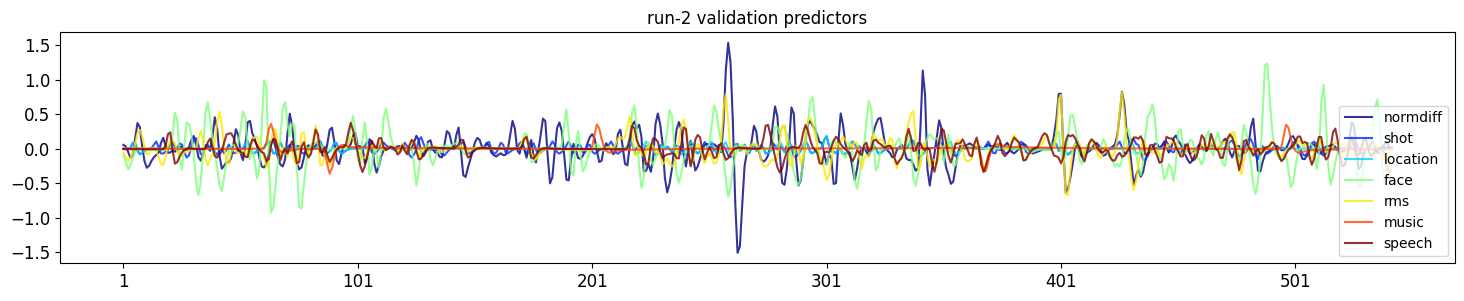

In [14]:
fig = plt.figure()
axes = data4plot.plot(y=['normdiff',"shot","location","face",'rms',"music",'speech'], colormap='jet',fontsize = 12,alpha = 0.8,
        title=name +' validation predictors',kind="line", 
        figsize=(18,3)).get_figure().savefig((os.path.join(os.getcwd(),'model',name+'_validation_preds.png')))
 
# display plot
plt.show()